In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
# Import the pandas library
import pandas as pd

file_name = "month_data.csv"
# Define the file path
file_path = r"data" + "/" + file_name

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path, sep=';', encoding='utf-8')

# Display the first few rows of the DataFrame
print(df.head())



   Tåguppdrag   Datum_PAU Tågslag Tågsort UppehållstypAvgång  \
0      1710.0  2019-03-23     RST  PENDEL           Uppehåll   
1      1710.0  2019-03-27     RST  PENDEL           Uppehåll   
2      1710.0  2019-03-16     RST  PENDEL           Uppehåll   
3       546.0  2019-03-31     RST   SNABB           Uppehåll   
4      7445.0  2019-03-04     RST  REGION            Passage   

  UppehållstypAnkomst  AktivitetskodAvgång AktivitetskodBeskrivningAvgång  \
0               Sista                   11  Av- och påstigande av resande   
1               Sista                   11  Av- och påstigande av resande   
2               Sista                   11  Av- och påstigande av resande   
3             Passage                   11  Av- och påstigande av resande   
4             Passage                    0                              -   

   AktivitetskodAnkomst AktivitetskodBeskrivningAnkomst  ...  \
0                    10           Avstigande av resande  ...   
1                    10 

In [28]:
#get all rows with tåguppdrag 1710.0
df_filter = df[(df['Tåguppdrag'] == 1710.0)& (df['Datum_PAU'] == "2019-03-23")]
#get only avgångsplats and ankomstplats
#get the unique values of Datum_PAU

df_filter = df_filter[['Avgångsplats', 'Ankomstplats', 'PlanAvgTid', 'PlanAnkTid', 'Datum_PAU', 'UppehållstypAvgång']]
print(df_filter)
##sort by planavgångstid
#df_filter = df_filter.sort_values(by='PlanAvgTid')

                    Avgångsplats             Ankomstplats  \
0        Helsingborg godsbangård            Helsingborg c   
269322              Östra Grevie         Västra Ingelstad   
297625                  Dösjebro                  Häljarp   
308331                     Åkarp             Åkarps norra   
526989                   Lockarp               Svågertorp   
692095          Skytts Vemmerlöv             Östra Grevie   
755565                    Hyllie                Triangeln   
871008              Åkarps norra                   Hjärup   
876053                    Hjärup                 Flackarp   
1034246               Trelleborg         Skytts Vemmerlöv   
1088084                 Flackarp                   Lund c   
1158178                 Rydebäck  Helsingborg godsbangård   
1411308                 Glumslöv                 Rydebäck   
1569902                   Lund c                 Gunnesbo   
1792997                 Kävlinge                 Dösjebro   
1855075                 

In [29]:
test = {"test": 1, "hej": 2}
print(test)
print(test["test"])
print(test["hej"])
print(test.keys())
print(test.values())

#add a value to the dictionary
test["new"] = 3
print(test)

#check if key exists
print("test" in test)

for item in test:
    print(item)
    #print the value of the key
    print(test[item])

{'test': 1, 'hej': 2}
1
2
dict_keys(['test', 'hej'])
dict_values([1, 2])
{'test': 1, 'hej': 2, 'new': 3}
True
test
1
hej
2
new
3


In [30]:
#rows = df(df['Ankomstplats'] == 'Uppsala C')
test = df[df['Ankomstplats'] == 'Lockarp']
test = test['Avgångsplats'].unique()

print(test)

#last = test[test['UppehållstypAnkomst'] == 'Sista']
#print(last.shape)
#print(last)


#print all stations 
stations = df['Ankomstplats'].unique()
print(stations)


['Svågertorp' 'Västra Ingelstad' 'Fosieby' 'Oxie']
['Helsingborg c' 'Malmö Godsbangård' 'Stöcke' ... '-' 'Malung' 'Verkebäck']


In [31]:
# Select the relevant columns and drop duplicates
unique_edges = df[['Avgångsplats', 'Ankomstplats']].drop_duplicates()

# Convert to a list of lists (if that's what you want)
edges = unique_edges.values.tolist()

#print(edges)
#get all rows in df where ['Avgångsplats', 'Ankomstplats'] is ['Malmö c', 'Malmö Godsbangård']
test = df[(df['Avgångsplats'] == 'Nyköping c') & (df['Ankomstplats'] == 'Enstaberga')]
#get only the colums UtfAnkTid UtfAvgTid
test = test[['UtfAvgTid', 'UtfAnkTid']]
print(test.shape)
print(test)

time_diff = pd.to_datetime(test['UtfAnkTid']) - pd.to_datetime(test['UtfAvgTid'])
# Convert the time difference to minutes
time_diff = time_diff.dt.total_seconds() / 60
print(time_diff)
# Calculate the mean time difference
mean_time_diff = time_diff.mean()
print(mean_time_diff.round(2))


(515, 2)
                       UtfAvgTid                UtfAnkTid
16654    2019-03-24 22:53:00.000  2019-03-24 22:56:00.000
28587    2019-03-30 12:48:00.000  2019-03-30 12:54:00.000
29757    2019-03-23 12:45:00.000  2019-03-23 12:50:00.000
33552    2019-03-09 08:34:00.000  2019-03-09 08:38:00.000
33553    2019-03-16 08:34:00.000  2019-03-16 08:38:00.000
...                          ...                      ...
2612098  2019-03-02 02:34:00.000  2019-03-02 02:38:00.000
2624305  2019-03-21 18:02:00.000  2019-03-21 18:06:00.000
2625107  2019-03-14 09:08:00.000  2019-03-14 09:15:00.000
2640876  2019-03-15 07:09:00.000  2019-03-15 07:13:00.000
2648156  2019-03-21 08:33:00.000  2019-03-21 08:38:00.000

[515 rows x 2 columns]
16654      3.0
28587      6.0
29757      5.0
33552      4.0
33553      4.0
          ... 
2612098    4.0
2624305    4.0
2625107    7.0
2640876    4.0
2648156    5.0
Length: 515, dtype: float64
4.45


In [32]:
# find all rows in df with Tåguppdrag = 1710.0
df_1710 = df[df['Datum_PAU'] == "2019-03-09"] 
df_filter = df_1710[df_1710['Tåguppdrag'] == 59771.0]
#print(df_filter.columns)
#print(df_filter.head(10))
  
rows_count = df_filter.shape[0]
print("Number of rows with Tåguppdrag = 1710.0: ", rows_count)
#sort the data ascending from DelSträckanummer
df_filter = df_filter.sort_values(by=['DelSträckanummer'])
#print(df_filter.head(25))

#only columns Ankomstplats and Avgångsplats  'PlanAvgTid', 'PlanAnkTid', 'UtfAnkTid',       'UtfAvgTid'
df_filter = df_filter[['Avgångsplats', 'Ankomstplats', 'PlanAvgTid', 'PlanAnkTid', 'UtfAnkTid', 'UtfAvgTid', 'DelSträckanummer', 'UppehållstypAnkomst']]
print(df_filter.head(25))


Number of rows with Tåguppdrag = 1710.0:  5
           Avgångsplats    Ankomstplats               PlanAvgTid  \
969966          Malmö c       Östervärn  2019-03-09 15:20:00.000   
606570        Östervärn       Rosengård  2019-03-09 15:22:00.000   
509582        Rosengård  Malmö Persborg  2019-03-09 15:24:00.000   
2148486  Malmö Persborg         Fosieby  2019-03-09 15:24:00.000   
434096          Fosieby         Lockarp  2019-03-09 15:25:00.000   

                      PlanAnkTid                UtfAnkTid  \
969966   2019-03-09 15:22:00.000  2019-03-09 15:31:00.000   
606570   2019-03-09 15:24:00.000  2019-03-09 15:33:00.000   
509582   2019-03-09 15:24:00.000  2019-03-09 15:33:00.000   
2148486  2019-03-09 15:25:00.000  2019-03-09 15:34:00.000   
434096   2019-03-09 15:27:00.000  2019-03-09 15:36:00.000   

                       UtfAvgTid  DelSträckanummer UppehållstypAnkomst  
969966   2019-03-09 15:28:00.000                 1             Passage  
606570   2019-03-09 15:31:00.000  

In [33]:
df.columns = df.columns.str.strip()

In [34]:
df.fillna(method='ffill', inplace=True)
df.drop_duplicates(inplace=True)
df['Datum_PAU'] = pd.to_datetime(df['Datum_PAU'])

In [35]:
avg_delay = df.groupby('Tågslag')['AvgFörsening'].mean()
print(avg_delay)

Tågslag
GT     3.970023
RST    1.692135
SPF   -6.728155
TJT   -2.496385
VXR    1.389776
Name: AvgFörsening, dtype: float64


In [36]:
train_type_count = df['Tågslag'].value_counts()
print(train_type_count)

RST    2087165
GT      453078
TJT     118120
VXR        939
SPF        103
Name: Tågslag, dtype: int64


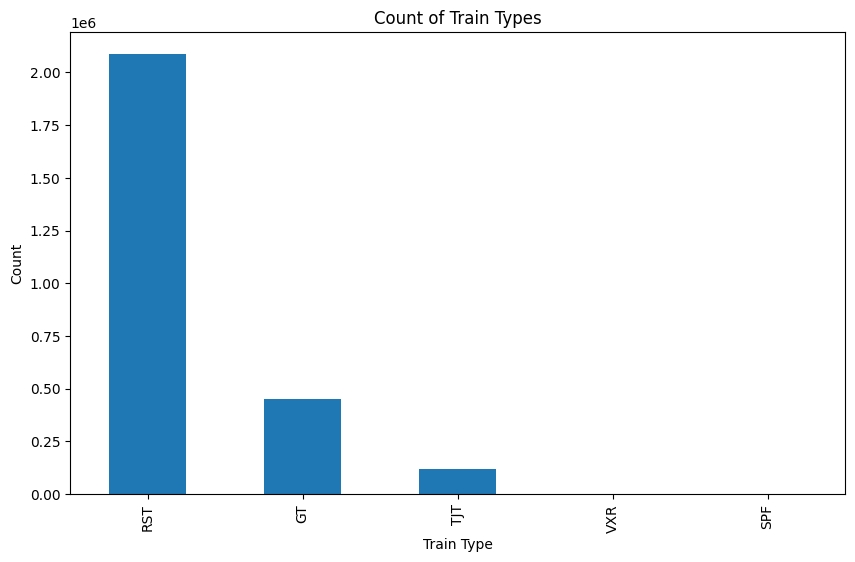

In [37]:
train_type_count.plot(kind='bar', figsize=(10, 6))
plt.title('Count of Train Types')
plt.xlabel('Train Type')
plt.ylabel('Count')
plt.show()

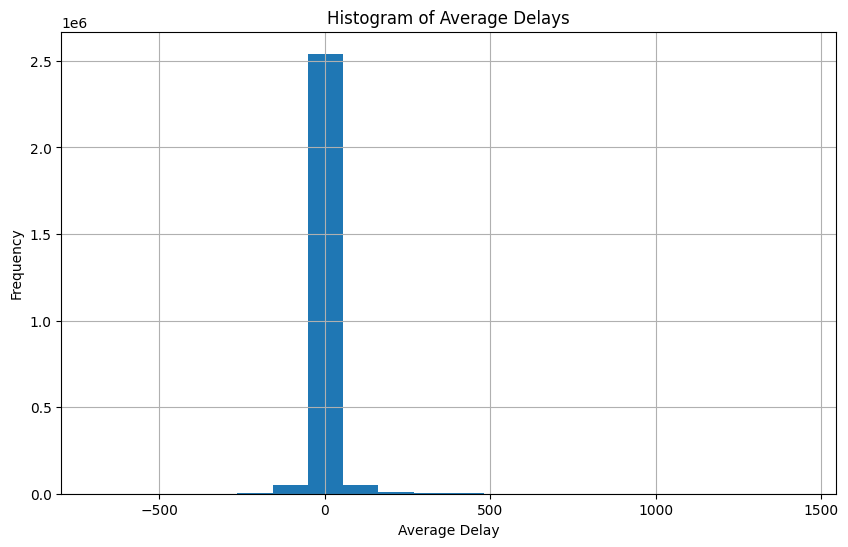

In [38]:
df['AvgFörsening'].hist(bins=20, figsize=(10, 6))
plt.title('Histogram of Average Delays')
plt.xlabel('Average Delay')
plt.ylabel('Frequency')
plt.show()

In [39]:
disturbances_df = pd.read_excel(excel_file_path)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\D\\achini\\Project Group 1\\disturbances.xlsx'

In [18]:
print(disturbances_df.head())

     UtfDatum Tågslag Tågsort  Tåguppdrag        Tåglänk     Plats HändelseId  \
0  2019-01-01      GT    GODS       16297  2019010116297   Älmhult   H2768756   
1  2019-01-01      GT    GODS       41430  2019010141430    Ramsjö   H2768840   
2  2019-01-01      GT    GODS       41430  2019010141430      Ånge   H2768840   
3  2019-01-01      GT    GODS       41745  2019010141745    Birsta   H2768700   
4  2019-01-01      GT    GODS       41745  2019010141745  Nedansjö   H2768700   

          Nivå1               Nivå2  Registrerad merförsening  
0  Följdorsaker  Stört av annat tåg                        99  
1  Följdorsaker  Stört av annat tåg                         3  
2  Följdorsaker  Stört av annat tåg                        18  
3  Följdorsaker  Stört av annat tåg                         8  
4  Följdorsaker  Stört av annat tåg                        21  


In [19]:
print(disturbances_df.shape)


(58643, 10)


In [20]:
print(disturbances_df.dtypes)


UtfDatum                    object
Tågslag                     object
Tågsort                     object
Tåguppdrag                   int64
Tåglänk                      int64
Plats                       object
HändelseId                  object
Nivå1                       object
Nivå2                       object
Registrerad merförsening     int64
dtype: object


In [21]:
print(disturbances_df.describe())


         Tåguppdrag       Tåglänk  Registrerad merförsening
count  58643.000000  5.864300e+04              58643.000000
mean   21532.869021  8.203357e+11                 16.233856
std    28338.645031  8.963710e+11                 42.564952
min        1.000000  2.019013e+08                  3.000000
25%     1826.000000  2.019021e+11                  4.000000
50%     7509.000000  2.019083e+11                  6.000000
75%    41741.000000  2.019032e+12                 12.000000
max    99995.000000  2.019123e+12               1439.000000


In [22]:
print(disturbances_df.isnull().sum())

UtfDatum                    0
Tågslag                     0
Tågsort                     0
Tåguppdrag                  0
Tåglänk                     0
Plats                       0
HändelseId                  0
Nivå1                       0
Nivå2                       0
Registrerad merförsening    0
dtype: int64


In [24]:
print(disturbances_df.columns)


Index(['UtfDatum', 'Tågslag', 'Tågsort', 'Tåguppdrag', 'Tåglänk', 'Plats',
       'HändelseId', 'Nivå1', 'Nivå2', 'Registrerad merförsening'],
      dtype='object')


In [25]:
print(disturbances_df['Registrerad merförsening'].describe())


count    58643.000000
mean        16.233856
std         42.564952
min          3.000000
25%          4.000000
50%          6.000000
75%         12.000000
max       1439.000000
Name: Registrerad merförsening, dtype: float64


In [26]:
train_counts = disturbances_df['Tågslag'].value_counts()
print(train_counts)


Tågslag
RST    31652
GT     19940
TJT     7048
SPF        3
Name: count, dtype: int64


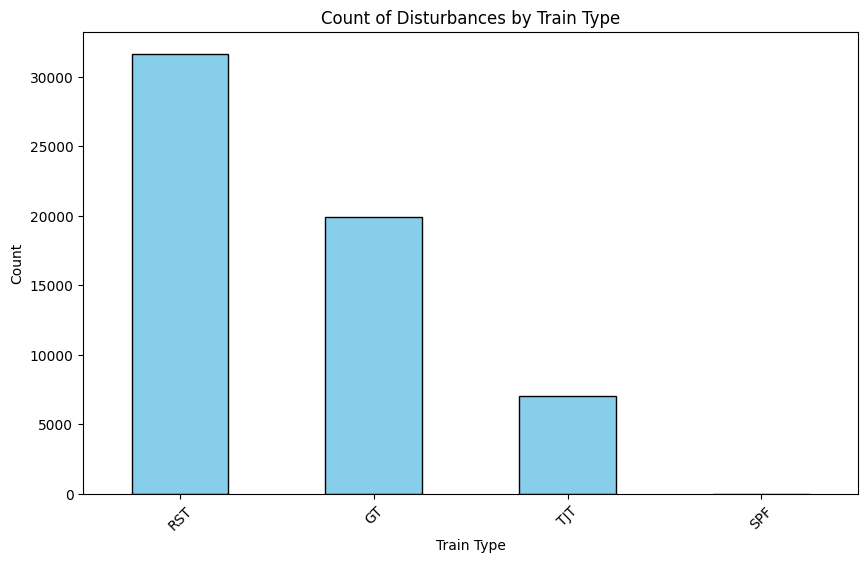

In [27]:
import matplotlib.pyplot as plt

train_counts.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Count of Disturbances by Train Type')
plt.xlabel('Train Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [25]:
import numpy as np


month_data = "month_data.csv"
file_path = r"data" + "/" + month_data
df = get_dataframe(file_path)


0.0
